<a href="https://colab.research.google.com/github/nguyenthinhuvan/CS523.M21.KHCL/blob/main/N_gram_and_word_lattices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KẾT NỐI ĐẾN GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


#**IMPORT THƯ VIỆN VÀ ĐỌC NGỮ LIỆU**

###**IMPORT THƯ VIỆN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

###**ĐỌC NGỮ LIỆU**

In [ ]:
df = pd.read_csv("corpus.txt")

In [ ]:
f = open("corpus.txt",'r',encoding = 'utf-8')
Corpus = f.read()
print(Corpus)

My name is Nguyen Thu Hoai. I am 22 years old and I am single. I live in Ho Chi Minh city and have just graduated from X university in August with the major in Accounting. I have got 3 months experience as an intern at A company. I like reading books and cooking. I am a careful and hard-working person. I am eager to learn new things and willing to work in team. I easily adapt to new working environment and take initiative in work.


###**Chuyển đổi toàn bộ các từ trong đoạn văn về dạng viết thường**

In [ ]:
Corpus = Corpus.lower()
print(Corpus)

my name is nguyen thu hoai. i am 22 years old and i am single. i live in ho chi minh city and have just graduated from x university in august with the major in accounting. i have got 3 months experience as an intern at a company. i like reading books and cooking. i am a careful and hard-working person. i am eager to learn new things and willing to work in team. i easily adapt to new working environment and take initiative in work.


#**CÁC HÀM**

###**HÀM TÁCH ĐOẠN VĂN THÀNH CÁC N-GRAMS**

In [ ]:
def extract_ngrams(data, n = 1):
  #Hàm rút trích các n-gram từ ngữ liệu

  import nltk
  nltk.download('punkt')
  from nltk.util import ngrams
  n_grams = ngrams(nltk.word_tokenize(data), n)
  return [ ' '.join(grams) for grams in n_grams]

###**HÀM LỌC CÁC N-GRAMS PHÂN BIỆT VÀ CHO RA SỐ LẦN XUẤT HIỆN CỦA N-GRAMS TƯƠNG ỨNG**

In [ ]:
def feature_LinkedMatrix(n_grams):
  # Hàm dùng để rút ra các n-grams phân biệt sau khi đã lọc cùng với số lượng xuất hiện
  count={}
  for i in n_grams:
      if i in count:
          count[i]+=1
      else:
          count[i]=1

  feature_ = []
  feature_ = [ grams for grams in count]

  return feature_, count

###**HÀM SINH MA TRẬN LIÊN KẾT**

In [ ]:
def Generate_LinkedMatrix(Corpus, n=2):
  #Hàm tạo ma trận liên kết từ ngữ liệu
  n_grams = extract_ngrams(Corpus, n)
  Grams, count = feature_LinkedMatrix(n_grams)
  Grams_1 = []
  Grams_1, count_1 = feature_LinkedMatrix(extract_ngrams(Corpus, n - 1))



  Headers,_ = feature_LinkedMatrix(extract_ngrams(Corpus, 1))
  Linked_Matrix = []
  for i in range(0, len(Grams_1)):
    Linked_Matrix.append([0 for j in range(0, len(Headers))])
    Linked_Matrix[len(Linked_Matrix) - 1].append(Grams_1[i])

  for i in Linked_Matrix:
    for j in range(0, len(i) - 1):
      index = str(i[len(i) - 1] + ' ' + Headers[j])
      if index in count:
        i[j] = count[index]

  Headers.append(' ')
  import pandas as pd 
  pd.DataFrame(Linked_Matrix).to_csv("LinkedMatrix.csv")
  df = pd.read_csv('LinkedMatrix.csv', names=Headers, skiprows=1)
  return df, Grams, count, Grams_1, count_1, Linked_Matrix, Headers

###**HÀM LỌC CÁC KÍ TỰ ĐẶC BIỆT**

In [ ]:
def Normalize_Corpus(Corpus):
  new_Corpus = ''
  Symbol = ['.', ',', ':', ';', '(', ')', '[', ']', '{', '}', '-', '+', '=', '*', '/', '!', '@', '#', '$', '%', '^', '&']
  for i in Corpus:
    if i not in Symbol:
      new_Corpus += i
  return new_Corpus

#**TÁCH NGỮ LIỆU ĐÃ ĐỌC THÀNH CÁC BI-GRAMS**

In [ ]:
Corpus = Normalize_Corpus(Corpus)
Bi_gram = extract_ngrams(Corpus, 2)
Bi_gram

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['my name',
 'name is',
 'is nguyen',
 'nguyen thu',
 'thu hoai',
 'hoai i',
 'i am',
 'am 22',
 '22 years',
 'years old',
 'old and',
 'and i',
 'i am',
 'am single',
 'single i',
 'i live',
 'live in',
 'in ho',
 'ho chi',
 'chi minh',
 'minh city',
 'city and',
 'and have',
 'have just',
 'just graduated',
 'graduated from',
 'from x',
 'x university',
 'university in',
 'in august',
 'august with',
 'with the',
 'the major',
 'major in',
 'in accounting',
 'accounting i',
 'i have',
 'have got',
 'got 3',
 '3 months',
 'months experience',
 'experience as',
 'as an',
 'an intern',
 'intern at',
 'at a',
 'a company',
 'company i',
 'i like',
 'like reading',
 'reading books',
 'books and',
 'and cooking',
 'cooking i',
 'i am',
 'am a',
 'a careful',
 'careful and',
 'and hardworking',
 'hardworking person',
 'person i',
 'i am',
 'am eager',
 'eager to',
 'to learn',
 'learn new',
 'new things',
 'things and',
 'and willing',
 'willing to',
 'to work',
 'work in',
 'in team',
 'te

#**ĐẾM SÔ LẦN XUẤT HIỆN CỦA CÁC BI-GRAMS**

In [ ]:
df, Grams, count, Grams_1, count_1, Linked_Matrix, Headers = Generate_LinkedMatrix(Corpus, n=2)
"""
  df:                 là file csv lưu ma trận
  Grams:              là các token theo n-gram với n từ
  count:              là đếm số lần xuất hiện của các gram trong Grams
  Grams_1:            chính là các token với n - 1 từ
  count_1:            là đếm số lần xuất hiện của các gram trong Grams_1
  Linked_Matrix:      Ma trận liên kết, giúp tạo nên đồ thị
  Headers:            Đóng vai trò tương tự như 1 Uni-gram
"""
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,my,name,is,nguyen,thu,hoai,i,am,22,years,...,willing,work,team,easily,adapt,working,environment,take,initiative,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,my
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,name
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,is
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nguyen
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,adapt
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,working
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,environment
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,take


#**MA TRẬN LƯU TRỌNG SỐ CỦA CẠNH SAU KHI TÍNH XÁC SUẤT THEO CÔNG THỨC CỦA N-GRAMS**

In [ ]:
for i in Linked_Matrix:
  for j in range(0, len(i) - 1):
    index = str(i[len(i) - 1] + ' ' + Headers[j])
    index_1 = str(i[len(i) - 1])
    if index in count:
      p = count[index] / count_1[index_1]
      i[j] = p

import pandas as pd 
pd.DataFrame(Linked_Matrix).to_csv("LinkedMatrix.csv")
df = pd.read_csv('LinkedMatrix.csv', names=Headers, skiprows=1)
df

,my,name,is,nguyen,thu,hoai,i,am,22,years,...,willing,work,team,easily,adapt,working,environment,take,initiative,
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,my
1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,name
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,is
3,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nguyen
4,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adapt
57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,working
58,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,environment
59,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,take


#**CẤU TẠO ĐỒ THỊ DỰA TRÊN MA TRẬN LIÊN KẾT PHÍA TRÊN**

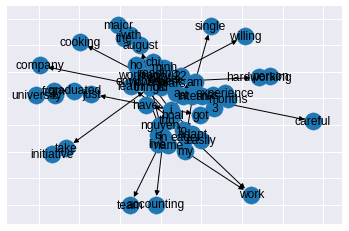

In [ ]:
import networkx as nx

G = nx.DiGraph()
for i in Linked_Matrix:
  for j in range(0, len(i) - 1):
    if i[j] != 0:
      G.add_edges_from([(i[len(i) - 1], Headers[j])])
    if nx.is_directed_acyclic_graph(G) == False:
      G.remove_edges_from([(i[len(i) - 1], Headers[j])])
plt.tight_layout()
nx.draw_networkx(G, arrows=True)
plt.savefig("Graph.png", format="PNG")